In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_excel("drive/MyDrive/Predict5/Model-development/dataset/project.xlsx",parse_dates=["Date"],index_col=[0])

In [ ]:
print(df.index.freq)

None


In [ ]:
df.shape

(861, 2)

In [ ]:
df.head()

,Wave,Wind
Date,,
2020-01-01,1526,7
2020-01-02,1478,5
2020-01-03,1441,6
2020-01-04,1431,6
2020-01-05,1469,9


In [ ]:
df.tail()

,Wave,Wind
Date,,
2022-05-06,1501,6
2022-05-07,1483,3
2022-05-08,1436,3
2022-05-09,1453,6
2022-05-10,1518,6


In [ ]:
test_split=round(len(df)*0.20)

In [ ]:
test_split

172

In [ ]:
df_for_training=df[:-172]
df_for_testing=df[-172:]

In [ ]:
print(df_for_training.shape)
print(df_for_testing.shape)

(689, 2)
(172, 2)


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
df_for_training_scaled = scaler.fit_transform(df_for_training)

In [ ]:
df_for_testing_scaled=scaler.transform(df_for_testing)

In [ ]:
df_for_training_scaled

array([[0.8432856 , 0.23809524],
       [0.83031613, 0.14285714],
       [0.82031883, 0.19047619],
       ...,
       [0.87327749, 0.0952381 ],
       [0.85787625, 0.14285714],
       [0.86760335, 0.42857143]])

In [ ]:
df_for_training_scaled.shape

(689, 2)

In [ ]:
df_for_testing_scaled.shape

(172, 2)

In [ ]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)   

In [ ]:
trainX,trainY=createXY(df_for_training_scaled,30)

In [ ]:
trainX.shape

(659, 30, 2)

In [ ]:
testX,testY=createXY(df_for_testing_scaled,30)

In [ ]:
trainX[0]

array([[0.84625777, 0.14285714],
       [0.86003783, 0.19047619],
       [0.85166171, 0.19047619],
       [0.80707917, 0.52380952],
       [0.82464199, 0.0952381 ],
       [0.85490408, 0.14285714],
       [0.86409079, 0.19047619],
       [0.84922994, 0.42857143],
       [0.84247501, 0.33333333],
       [0.85193191, 0.23809524],
       [0.87030532, 0.14285714],
       [0.85139152, 0.14285714],
       [0.88003242, 0.23809524],
       [0.87895163, 0.0952381 ],
       [0.84436639, 0.19047619],
       [0.7843826 , 0.42857143],
       [0.83004593, 0.23809524],
       [0.87706025, 0.19047619],
       [0.85706566, 0.33333333],
       [0.85031073, 0.14285714],
       [0.84625777, 0.14285714],
       [0.84760875, 0.19047619],
       [0.84139422, 0.23809524],
       [0.84517698, 0.28571429],
       [0.85463388, 0.19047619],
       [0.84652797, 0.0952381 ],
       [0.8427452 , 0.14285714],
       [0.8430154 , 0.0952381 ],
       [0.85166171, 0.19047619],
       [0.86003783, 0.19047619]])

In [ ]:
print("trainX Shape-- ",trainX.shape)
print("trainY Shape-- ",trainY.shape)

trainX Shape--  (142, 30, 2)
trainY Shape--  (142,)


In [ ]:
print("testX Shape-- ",testX.shape)
print("testY Shape-- ",testY.shape)

testX Shape--  (142, 30, 2)
testY Shape--  (142,)


In [ ]:
print("trainX[0]-- \n",trainX[0])
print("\ntrainY[0]-- ",trainY[0])

trainX[0]-- 
 [[0.84625777 0.14285714]
 [0.86003783 0.19047619]
 [0.85166171 0.19047619]
 [0.80707917 0.52380952]
 [0.82464199 0.0952381 ]
 [0.85490408 0.14285714]
 [0.86409079 0.19047619]
 [0.84922994 0.42857143]
 [0.84247501 0.33333333]
 [0.85193191 0.23809524]
 [0.87030532 0.14285714]
 [0.85139152 0.14285714]
 [0.88003242 0.23809524]
 [0.87895163 0.0952381 ]
 [0.84436639 0.19047619]
 [0.7843826  0.42857143]
 [0.83004593 0.23809524]
 [0.87706025 0.19047619]
 [0.85706566 0.33333333]
 [0.85031073 0.14285714]
 [0.84625777 0.14285714]
 [0.84760875 0.19047619]
 [0.84139422 0.23809524]
 [0.84517698 0.28571429]
 [0.85463388 0.19047619]
 [0.84652797 0.0952381 ]
 [0.8427452  0.14285714]
 [0.8430154  0.0952381 ]
 [0.85166171 0.19047619]
 [0.86003783 0.19047619]]

trainY[0]--  0.8408538232910023


In [ ]:
trainY[0]

0.8408538232910023

In [ ]:
trainY.shape

(142,)

In [ ]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
def build_model(optimizer):
    grid_model = Sequential()
    grid_model.add(LSTM(50,return_sequences=True,input_shape=(30,2)))
    grid_model.add(LSTM(50))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(2))
   

    grid_model.compile(loss = 'mse',optimizer = optimizer)
    return grid_model

grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))
parameters = {'batch_size' : [16,20],
              'epochs' : [8,10],
              'optimizer' : ['adam','Adadelta'] }

grid_search  = GridSearchCV(estimator = grid_model,
                            param_grid = parameters,
                            cv = 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  if sys.path[0] == '':


In [ ]:
grid_search = grid_search.fit(trainX,trainY)

Epoch 1/8
5/5 [==============================] - 7s 279ms/step - loss: 0.4113 - val_loss: 0.1186
Epoch 2/8
5/5 [==============================] - 0s 52ms/step - loss: 0.0617 - val_loss: 0.0727
Epoch 3/8
5/5 [==============================] - 0s 51ms/step - loss: 0.0576 - val_loss: 0.0027
Epoch 4/8
5/5 [==============================] - 0s 51ms/step - loss: 0.0177 - val_loss: 0.0199
Epoch 5/8
5/5 [==============================] - 0s 54ms/step - loss: 0.0301 - val_loss: 0.0102
Epoch 6/8
5/5 [==============================] - 0s 59ms/step - loss: 0.0172 - val_loss: 0.0034
Epoch 7/8
5/5 [==============================] - 0s 50ms/step - loss: 0.0172 - val_loss: 0.0057
Epoch 8/8
5/5 [==============================] - 0s 8ms/step - loss: 0.0027
Epoch 1/8
5/5 [==============================] - 5s 267ms/step - loss: 0.4501 - val_loss: 0.1906
Epoch 2/8
5/5 [==============================] - 0s 49ms/step - loss: 0.0934 - val_loss: 0.0270
Epoch 3/8
5/5 [==============================] - 0s 52ms/s

In [ ]:
grid_search.best_params_

{'batch_size': 20, 'epochs': 10, 'optimizer': 'adam'}

In [ ]:
my_model=grid_search.best_estimator_.model\

In [ ]:
my_model

In [ ]:
prediction=my_model.predict(testX)

5/5 [==============================] - 0s 11ms/step


In [ ]:
print("prediction\n", prediction)
print("\nPrediction Shape-",prediction.shape)

prediction
 [[0.84247863 0.824976  ]
 [0.84166515 0.8238002 ]
 [0.8405386  0.82176286]
 [0.8390745  0.81974816]
 [0.8378912  0.81890863]
 [0.8365583  0.81827885]
 [0.83559847 0.81726867]
 [0.83412856 0.81580704]
 [0.8328341  0.8152425 ]
 [0.8318129  0.8147452 ]
 [0.8310313  0.81399673]
 [0.8306346  0.8127939 ]
 [0.83021355 0.8121297 ]
 [0.82888645 0.8109807 ]
 [0.82655144 0.8085798 ]
 [0.82299554 0.80483514]
 [0.82040906 0.80189514]
 [0.8191136  0.8004621 ]
 [0.8184796  0.7997399 ]
 [0.8177819  0.7995851 ]
 [0.81759787 0.79943234]
 [0.81726694 0.7992626 ]
 [0.81694376 0.79982096]
 [0.81657976 0.79963696]
 [0.8149106  0.7988425 ]
 [0.81384796 0.7978188 ]
 [0.8109621  0.7948852 ]
 [0.8064611  0.78990895]
 [0.80199176 0.7851575 ]
 [0.79833233 0.78254634]
 [0.79625595 0.7825882 ]
 [0.7950822  0.78202975]
 [0.79309165 0.78032494]
 [0.7927605  0.7796067 ]
 [0.793542   0.779849  ]
 [0.7946093  0.78071886]
 [0.79604745 0.78211635]
 [0.79740393 0.7834103 ]
 [0.79207504 0.7772433 ]
 [0.7856877  

In [ ]:
prediction.shape

(142, 2)

In [ ]:
scaler.inverse_transform(prediction)

array([[1523.0133  ,   19.324497],
       [1520.0027  ,   19.299805],
       [1515.8334  ,   19.257019],
       [1510.4147  ,   19.214712],
       [1506.0354  ,   19.19708 ],
       [1501.1022  ,   19.183855],
       [1497.5499  ,   19.162642],
       [1492.1097  ,   19.131948],
       [1487.3191  ,   19.120092],
       [1483.5396  ,   19.10965 ],
       [1480.6469  ,   19.093931],
       [1479.1786  ,   19.068672],
       [1477.6202  ,   19.054724],
       [1472.7087  ,   19.030594],
       [1464.0668  ,   18.980175],
       [1450.9065  ,   18.901537],
       [1441.3339  ,   18.839798],
       [1436.5394  ,   18.809704],
       [1434.193   ,   18.794538],
       [1431.6108  ,   18.791286],
       [1430.9297  ,   18.788078],
       [1429.7048  ,   18.784513],
       [1428.5088  ,   18.79624 ],
       [1427.1616  ,   18.792376],
       [1420.984   ,   18.775692],
       [1417.0513  ,   18.754194],
       [1406.3706  ,   18.692589],
       [1389.7124  ,   18.588087],
       [1373.1715  ,

In [ ]:
prediction_copies_array = np.repeat(prediction,1, axis=-1)

In [ ]:
prediction_copies_array.shape

(142, 2)

In [ ]:
prediction_copies_array

array([[0.84247863, 0.824976  ],
       [0.84166515, 0.8238002 ],
       [0.8405386 , 0.82176286],
       [0.8390745 , 0.81974816],
       [0.8378912 , 0.81890863],
       [0.8365583 , 0.81827885],
       [0.83559847, 0.81726867],
       [0.83412856, 0.81580704],
       [0.8328341 , 0.8152425 ],
       [0.8318129 , 0.8147452 ],
       [0.8310313 , 0.81399673],
       [0.8306346 , 0.8127939 ],
       [0.83021355, 0.8121297 ],
       [0.82888645, 0.8109807 ],
       [0.82655144, 0.8085798 ],
       [0.82299554, 0.80483514],
       [0.82040906, 0.80189514],
       [0.8191136 , 0.8004621 ],
       [0.8184796 , 0.7997399 ],
       [0.8177819 , 0.7995851 ],
       [0.81759787, 0.79943234],
       [0.81726694, 0.7992626 ],
       [0.81694376, 0.79982096],
       [0.81657976, 0.79963696],
       [0.8149106 , 0.7988425 ],
       [0.81384796, 0.7978188 ],
       [0.8109621 , 0.7948852 ],
       [0.8064611 , 0.78990895],
       [0.80199176, 0.7851575 ],
       [0.79833233, 0.78254634],
       [0.

In [ ]:
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),2)))[:,0]

In [ ]:
pred

array([1523.0133, 1520.0027, 1515.8334, 1510.4147, 1506.0354, 1501.1022,
       1497.5499, 1492.1097, 1487.3191, 1483.5396, 1480.6469, 1479.1786,
       1477.6202, 1472.7087, 1464.0668, 1450.9065, 1441.3339, 1436.5394,
       1434.193 , 1431.6108, 1430.9297, 1429.7048, 1428.5088, 1427.1616,
       1420.984 , 1417.0513, 1406.3706, 1389.7124, 1373.1715, 1359.6279,
       1351.9432, 1347.5992, 1340.2322, 1339.0065, 1341.899 , 1345.849 ,
       1351.1715, 1356.1919, 1336.4696, 1312.8301, 1288.0958, 1263.5369,
       1241.9481, 1222.092 , 1205.8982, 1197.1703, 1192.1006, 1193.6963,
       1198.6128, 1209.5515, 1218.5563, 1224.4299, 1231.9061, 1234.8677,
       1235.3673, 1234.2365, 1235.3127, 1232.5015, 1234.3779, 1242.902 ,
       1257.0026, 1270.6968, 1283.4669, 1293.0214, 1299.3099, 1302.7999,
       1306.6595, 1310.362 , 1306.0079, 1298.1176, 1288.766 , 1281.8336,
       1270.5219, 1254.7712, 1237.7566, 1226.8723, 1221.3364, 1222.9626,
       1230.6724, 1239.685 , 1248.9979, 1256.498 , 

In [ ]:
original_copies_array = np.repeat(testY,2, axis=-1)

original_copies_array.shape

original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),2)))[:,0]

In [ ]:
pred

array([1523.0133, 1520.0027, 1515.8334, 1510.4147, 1506.0354, 1501.1022,
       1497.5499, 1492.1097, 1487.3191, 1483.5396, 1480.6469, 1479.1786,
       1477.6202, 1472.7087, 1464.0668, 1450.9065, 1441.3339, 1436.5394,
       1434.193 , 1431.6108, 1430.9297, 1429.7048, 1428.5088, 1427.1616,
       1420.984 , 1417.0513, 1406.3706, 1389.7124, 1373.1715, 1359.6279,
       1351.9432, 1347.5992, 1340.2322, 1339.0065, 1341.899 , 1345.849 ,
       1351.1715, 1356.1919, 1336.4696, 1312.8301, 1288.0958, 1263.5369,
       1241.9481, 1222.092 , 1205.8982, 1197.1703, 1192.1006, 1193.6963,
       1198.6128, 1209.5515, 1218.5563, 1224.4299, 1231.9061, 1234.8677,
       1235.3673, 1234.2365, 1235.3127, 1232.5015, 1234.3779, 1242.902 ,
       1257.0026, 1270.6968, 1283.4669, 1293.0214, 1299.3099, 1302.7999,
       1306.6595, 1310.362 , 1306.0079, 1298.1176, 1288.766 , 1281.8336,
       1270.5219, 1254.7712, 1237.7566, 1226.8723, 1221.3364, 1222.9626,
       1230.6724, 1239.685 , 1248.9979, 1256.498 , 

In [ ]:
print("Pred Values-- " ,pred)
print("\nOriginal Values-- ",original)

Pred Values--  [1523.0133 1520.0027 1515.8334 1510.4147 1506.0354 1501.1022 1497.5499
 1492.1097 1487.3191 1483.5396 1480.6469 1479.1786 1477.6202 1472.7087
 1464.0668 1450.9065 1441.3339 1436.5394 1434.193  1431.6108 1430.9297
 1429.7048 1428.5088 1427.1616 1420.984  1417.0513 1406.3706 1389.7124
 1373.1715 1359.6279 1351.9432 1347.5992 1340.2322 1339.0065 1341.899
 1345.849  1351.1715 1356.1919 1336.4696 1312.8301 1288.0958 1263.5369
 1241.9481 1222.092  1205.8982 1197.1703 1192.1006 1193.6963 1198.6128
 1209.5515 1218.5563 1224.4299 1231.9061 1234.8677 1235.3673 1234.2365
 1235.3127 1232.5015 1234.3779 1242.902  1257.0026 1270.6968 1283.4669
 1293.0214 1299.3099 1302.7999 1306.6595 1310.362  1306.0079 1298.1176
 1288.766  1281.8336 1270.5219 1254.7712 1237.7566 1226.8723 1221.3364
 1222.9626 1230.6724 1239.685  1248.9979 1256.498  1258.858  1259.0525
 1260.4203 1260.1312 1259.6075 1262.0023 1266.8317 1274.7388 1278.2719
 1284.43   1293.5363 1302.669  1310.2615 1315.8638 1318.7399 13

In [ ]:
import matplotlib.pyplot as plt

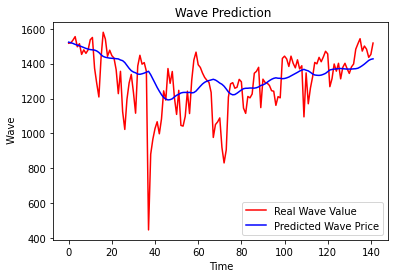

In [ ]:
plt.plot(original, color = 'red', label = 'Real Wave Value')
plt.plot(pred, color = 'blue', label = 'Predicted Wave Price')
plt.title(' Wave Prediction')
plt.xlabel('Time')
plt.ylabel(' Wave')
plt.legend()
plt.show()

In [ ]:
df_30_days_past=df.iloc[-30:,:]

In [ ]:
df_30_days_past

,Wave,Wind
Date,,
2022-04-11,1260,7
2022-04-12,1324,5
2022-04-13,1407,3
2022-04-14,1399,4
2022-04-15,1436,6
2022-04-16,1411,4
2022-04-17,1439,8
2022-04-18,1471,4
2022-04-19,1456,3


In [72]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

In [ ]:
import joblib
scalerfile = 'lstm_prediksi_berlayar.pkl'
joblib.dump(scaler, open(scalerfile, 'wb'))